In [4]:
import tensorflow as tf

In [5]:
import pandas

In [6]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [7]:
data_dir ="C:\\Users\\Yatri\\Desktop\\ShapeAI project\\dataset"

In [8]:
categories = ["Daisy","Dandelion","Sunflower","Rose","Tulip"]

In [9]:
data = []
def make_data():
    for category in categories:
        path = os.path.join(data_dir,category)
        # label = category
        label = categories.index(category)
        print(str(label)+ " - " + category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path,img_name)
            image = cv2.imread(img_path)
            try:
                image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image = cv2.resize(image,(224,224))
                image = np.array(image,dtype=np.float32)
                data.append([image,label])

            except Exception as e:
                pass
    print(len(data))
    pik = open("data.pickle","wb")
    pickle.dump(data,pik)
    pik.close()
make_data()

0 - Daisy
1 - Dandelion
2 - Sunflower
3 - Rose
4 - Tulip
4327


In [10]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [11]:
def load_data():
    pick  = open("data.pickle","rb")
    data = pickle.load(pick)
    pick.close()
    
    np.random.shuffle(data)
    feature = []
    labels = []
    
    for img , label in data:
        feature.append(img)
        labels.append(label)

    # le=LabelEncoder()
    # labels = le.fit_transform(labels)
    # labels=to_categorical(labels,5)
    
    feature = np.array(feature, dtype=np.float32)
    labels = np.array(labels)

    feature = feature/255.0

    return [feature, labels]
    

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
feature,labels = load_data()

In [14]:
labels

array([3, 4, 1, ..., 1, 4, 2])

In [15]:
print(feature.shape)

(4327, 224, 224, 3)


In [16]:
import random as rn

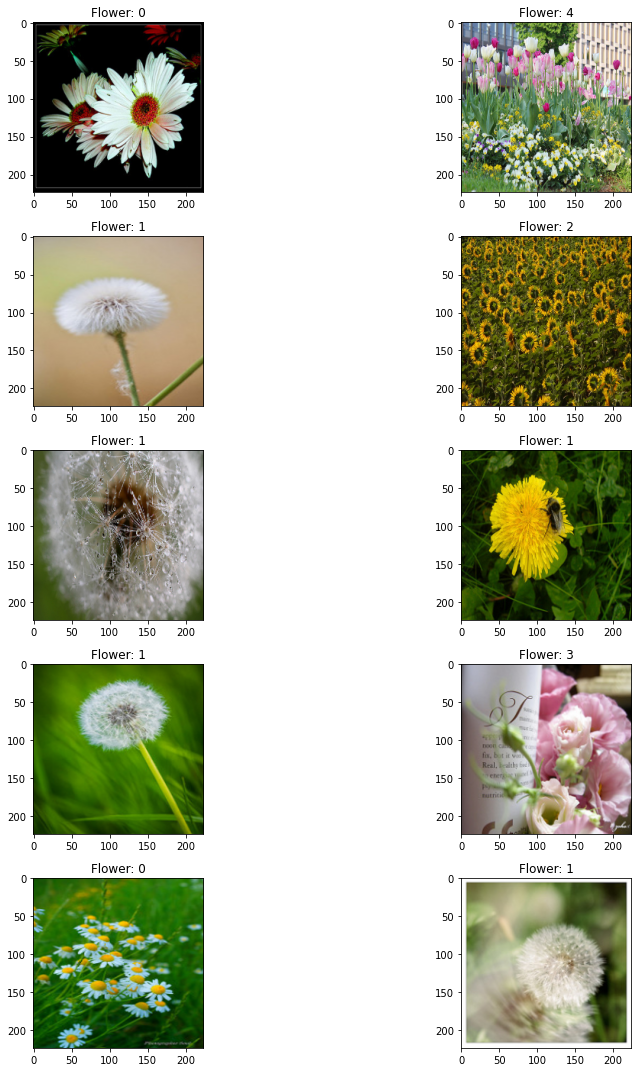

In [17]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(labels))
        ax[i,j].imshow(feature[l])
        ax[i,j].set_title('Flower: '+str(labels[l]))
        
plt.tight_layout()

In [18]:
x_train,x_test,y_train,y_test = train_test_split(feature,labels,test_size = 0.25,random_state = 42)

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dropout,Flatten, Dense, Activation,BatchNormalization

In [20]:
tf.random.set_seed(
  np.random.seed(42)
)

In [21]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), padding="Same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="Same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3), padding="Same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="Same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(5, activation='sigmoid'))

model.add(Flatten())



In [22]:
batch_size=128
epochs=15

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [23]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [24]:
model.compile(loss='binary_crossentropy',
             optimizer='RMSProp',
             metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0

In [26]:
# History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_test,y_test),verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
History = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/15
26/26 [==============================] - 305s 11s/step - loss: -1.1913 - accuracy: 0.0052 - val_loss: -0.6719 - val_accuracy: 0.0638
Epoch 2/15
26/26 [==============================] - 290s 11s/step - loss: -3.9382 - accuracy: 0.0092 - val_loss: -1.2245 - val_accuracy: 0.0231
Epoch 3/15
26/26 [==============================] - 285s 11s/step - loss: -6.8043 - accuracy: 0.0068 - val_loss: -6.3800 - val_accuracy: 0.0407
Epoch 4/15
26/26 [==============================] - 279s 11s/step - loss: -9.0584 - accuracy: 0.0194 - val_loss: -10.2698 - val_accuracy: 0.0555
Epoch 5/15
26/26 [==============================] - 278s 11s/step - loss: -11.0993 - accuracy: 0.0493 - val_loss: -13.7223 - val_accuracy: 0.0933
Epoch 6/15
26/26 [==============================] - 282s 11s/step - loss: -12.6426 - accuracy: 0.0681 - val_loss: -13.3505 - val_accuracy: 0.1165
Epoch 7/15
26/26 [==============================] - 282s 11s/step - loss: -13.7847 - accuracy: 0.0977 - val_loss: -10.9060 - val_ac

In [27]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [28]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
        
print(len(prop_class))
print(len(mis_class))

1082
0


In [31]:
model.save("mymodel.h5")